In [54]:
import pandas as pd

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv("/content/drive/MyDrive/IIT hackfest/train.csv")

In [57]:
df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_snacks,category_spices and herbs,category_vegetables,sales_revenue,market_share,product_category,timestamp,growth_rate,packaging,branding
0,0.890,3,-0.028850,11.19,1,1,9,False,False,False,...,False,False,False,33.57,0.000437,category_kitchen,00:00.0,NaN,0,0
1,0.990,0,0.173773,3.19,5,5,9,False,False,False,...,True,False,False,0.00,0.000000,category_snacks,00:00.0,NaN,0,0
2,0.980,1,0.173773,8.99,5,5,9,False,False,False,...,False,False,False,8.99,0.000117,category_cleaning products,00:00.0,NaN,0,0
3,0.660,0,0.173773,19.19,5,5,9,False,False,False,...,False,False,False,0.00,0.000000,category_seafood,00:00.0,NaN,0,0
4,0.345,0,0.173773,15.49,5,5,9,False,False,False,...,False,False,False,0.00,0.000000,category_kitchen,00:00.0,-1.0,0,0


## Preprocessing

In [58]:
df.isnull().sum()

estimated_stock_pct                  0
quantity                             0
temperature                          0
unit_price                           0
timestamp_day_of_month               0
timestamp_day_of_week                0
timestamp_hour                       0
category_baby products               0
category_baked goods                 0
category_baking                      0
category_beverages                   0
category_canned foods                0
category_cheese                      0
category_cleaning products           0
category_condiments and sauces       0
category_dairy                       0
category_frozen                      0
category_fruit                       0
category_kitchen                     0
category_meat                        0
category_medicine                    0
category_packaged foods              0
category_personal care               0
category_pets                        0
category_refrigerated items          0
category_seafood         

In [59]:
mean_growth_rate = df['growth_rate'].mean()
df['growth_rate'].fillna(mean_growth_rate, inplace=True)

In [60]:
df.isnull().sum()

estimated_stock_pct               0
quantity                          0
temperature                       0
unit_price                        0
timestamp_day_of_month            0
timestamp_day_of_week             0
timestamp_hour                    0
category_baby products            0
category_baked goods              0
category_baking                   0
category_beverages                0
category_canned foods             0
category_cheese                   0
category_cleaning products        0
category_condiments and sauces    0
category_dairy                    0
category_frozen                   0
category_fruit                    0
category_kitchen                  0
category_meat                     0
category_medicine                 0
category_packaged foods           0
category_personal care            0
category_pets                     0
category_refrigerated items       0
category_seafood                  0
category_snacks                   0
category_spices and herbs   

In [61]:
boolean_cols = ['category_baby products', 'category_baked goods', 'category_baking', 'category_beverages',
                'category_canned foods', 'category_cheese', 'category_cleaning products',
                'category_condiments and sauces', 'category_dairy', 'category_frozen', 'category_fruit',
                'category_kitchen', 'category_meat', 'category_medicine', 'category_packaged foods',
                'category_personal care', 'category_pets', 'category_refrigerated items',
                'category_seafood', 'category_snacks', 'category_spices and herbs', 'category_vegetables']

df['product_category_combined'] = df[boolean_cols].idxmax(axis=1)

df.drop(columns=boolean_cols, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   estimated_stock_pct        7999 non-null   float64
 1   quantity                   7999 non-null   int64  
 2   temperature                7999 non-null   float64
 3   unit_price                 7999 non-null   float64
 4   timestamp_day_of_month     7999 non-null   int64  
 5   timestamp_day_of_week      7999 non-null   int64  
 6   timestamp_hour             7999 non-null   int64  
 7   sales_revenue              7999 non-null   float64
 8   market_share               7999 non-null   float64
 9   product_category           7999 non-null   object 
 10  timestamp                  7999 non-null   object 
 11  growth_rate                7999 non-null   float64
 12  packaging                  7999 non-null   int64  
 13  branding                   7999 non-null   int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   estimated_stock_pct        7999 non-null   float64
 1   quantity                   7999 non-null   int64  
 2   temperature                7999 non-null   float64
 3   unit_price                 7999 non-null   float64
 4   timestamp_day_of_month     7999 non-null   int64  
 5   timestamp_day_of_week      7999 non-null   int64  
 6   timestamp_hour             7999 non-null   int64  
 7   sales_revenue              7999 non-null   float64
 8   market_share               7999 non-null   float64
 9   product_category           7999 non-null   object 
 10  timestamp                  7999 non-null   object 
 11  growth_rate                7999 non-null   float64
 12  packaging                  7999 non-null   int64  
 13  branding                   7999 non-null   int64

In [64]:
df.drop('product_category_combined',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   estimated_stock_pct     7999 non-null   float64
 1   quantity                7999 non-null   int64  
 2   temperature             7999 non-null   float64
 3   unit_price              7999 non-null   float64
 4   timestamp_day_of_month  7999 non-null   int64  
 5   timestamp_day_of_week   7999 non-null   int64  
 6   timestamp_hour          7999 non-null   int64  
 7   sales_revenue           7999 non-null   float64
 8   market_share            7999 non-null   float64
 9   product_category        7999 non-null   object 
 10  timestamp               7999 non-null   object 
 11  growth_rate             7999 non-null   float64
 12  packaging               7999 non-null   int64  
 13  branding                7999 non-null   int64  
dtypes: float64(6), int64(6), object(2)
memor

In [66]:
df.drop('timestamp',axis=1,inplace=True)

In [67]:


object_cols = ['product_category']

df = pd.get_dummies(df, columns=object_cols)


In [68]:
df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,sales_revenue,market_share,growth_rate,...,product_category_category_meat,product_category_category_medicine,product_category_category_packaged foods,product_category_category_personal care,product_category_category_pets,product_category_category_refrigerated items,product_category_category_seafood,product_category_category_snacks,product_category_category_spices and herbs,product_category_category_vegetables
0,0.890,3,-0.028850,11.19,1,1,9,33.57,0.000437,inf,...,False,False,False,False,False,False,False,False,False,False
1,0.990,0,0.173773,3.19,5,5,9,0.00,0.000000,inf,...,False,False,False,False,False,False,False,True,False,False
2,0.980,1,0.173773,8.99,5,5,9,8.99,0.000117,inf,...,False,False,False,False,False,False,False,False,False,False
3,0.660,0,0.173773,19.19,5,5,9,0.00,0.000000,inf,...,False,False,False,False,False,False,True,False,False,False
4,0.345,0,0.173773,15.49,5,5,9,0.00,0.000000,-1.0,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   estimated_stock_pct                              7999 non-null   float64
 1   quantity                                         7999 non-null   int64  
 2   temperature                                      7999 non-null   float64
 3   unit_price                                       7999 non-null   float64
 4   timestamp_day_of_month                           7999 non-null   int64  
 5   timestamp_day_of_week                            7999 non-null   int64  
 6   timestamp_hour                                   7999 non-null   int64  
 7   sales_revenue                                    7999 non-null   float64
 8   market_share                                     7999 non-null   float64
 9   growth_rate                   

#### Dividing dataset into 2 parts training and validation

In [70]:
from sklearn.model_selection import train_test_split
train_data , val_data = train_test_split(df,test_size=0.2,random_state=42)

## Making RandomForest for train data

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [72]:
X = train_data.drop(columns=['sales_revenue'])
y = train_data['sales_revenue']

In [73]:
import numpy as np
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [74]:
X.dropna(inplace=True)
y = y[X.index]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
predictions = rf_model.predict(X_test)

In [78]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.096824736298321


## Making Random Forest for validation data

In [79]:
X = val_data.drop(columns=['sales_revenue'])
y = val_data['sales_revenue']

In [80]:
import numpy as np
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [81]:
X.dropna(inplace=True)
y = y[X.index]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
predictions = rf_model.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.088206581931827


In [147]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/IIT hackfest/model.pkl')
model = joblib.load('/content/drive/MyDrive/IIT hackfest/model.pkl')

In [150]:
import pandas as pd

X_external = pd.read_csv('/content/drive/MyDrive/IIT hackfest/test.csv')

In [ ]:
X_external.info()

In [123]:
predictions = model.predict(X_external)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- category_baby products
- category_baked goods
- category_baking
- category_beverages
- category_canned foods
- ...
Feature names seen at fit time, yet now missing:
- product_category_category_baby products
- product_category_category_baked goods
- product_category_category_baking
- product_category_category_beverages
- product_category_category_canned foods
- ...


In [117]:
# Get the column names of the training data
training_features = X_train.columns

# Get the column names of the external data
external_features = X_external.columns

# Compare the two sets of column names
missing_features = set(training_features) - set(external_features)
extra_features = set(external_features) - set(training_features)

# Print the missing and extra features
print("Missing features:", missing_features)
print("Extra features:", extra_features)

Missing features: {'product_category_category_kitchen', 'product_category_category_canned foods', 'product_category_category_cheese', 'product_category_category_seafood', 'product_category_category_beverages', 'product_category_category_cleaning products', 'product_category_category_dairy', 'product_category_category_meat', 'product_category_category_fruit', 'product_category_category_packaged foods', 'product_category_category_baking', 'product_category_category_personal care', 'product_category_category_pets', 'product_category_category_vegetables', 'product_category_category_refrigerated items', 'product_category_category_frozen', 'product_category_category_condiments and sauces', 'product_category_category_snacks', 'product_category_category_spices and herbs', 'product_category_category_medicine', 'product_category_category_baby products', 'product_category_category_baked goods'}
Extra features: {'category_dairy', 'category_baking', 'sales_revenue', 'category_pets', 'timestamp', 'c

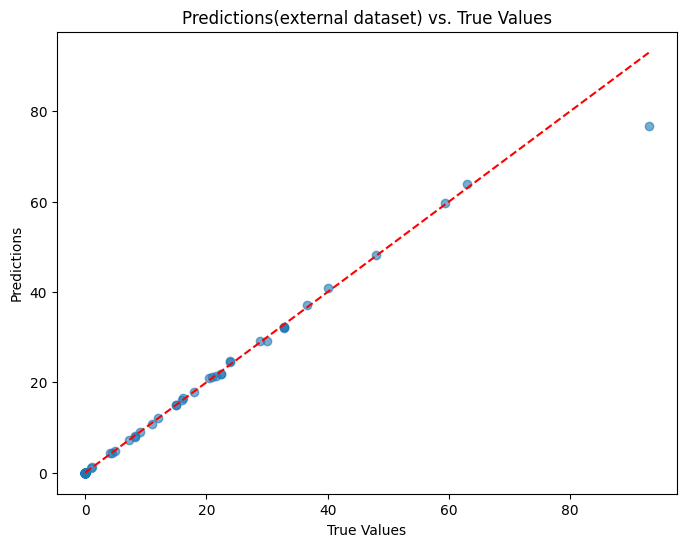

In [110]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions(external dataset) vs. True Values")
plt.show()
